---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

# Assignment 4 - Document Similarity & Topic Modelling

## Part 1 - Document Similarity

For the first part of this assignment, you will complete the functions `doc_to_synsets` and `similarity_score` which will be used by `document_path_similarity` to find the path similarity between two documents.

The following functions are provided:
* **`convert_tag:`** converts the tag given by `nltk.pos_tag` to a tag used by `wordnet.synsets`. You will need to use this function in `doc_to_synsets`.
* **`document_path_similarity:`** computes the symmetrical path similarity between two documents by finding the synsets in each document using `doc_to_synsets`, then computing similarities using `similarity_score`.

You will need to finish writing the following functions:
* **`doc_to_synsets:`** returns a list of synsets in document. This function should first tokenize and part of speech tag the document using `nltk.word_tokenize` and `nltk.pos_tag`. Then it should find each tokens corresponding synset using `wn.synsets(token, wordnet_tag)`. The first synset match should be used. If there is no match, that token is skipped.
* **`similarity_score:`** returns the normalized similarity score of a list of synsets (s1) onto a second list of synsets (s2). For each synset in s1, find the synset in s2 with the largest similarity value. Sum all of the largest similarity values together and normalize this value by dividing it by the number of largest similarity values found. Be careful with data types, which should be floats. Missing values should be ignored.

Once `doc_to_synsets` and `similarity_score` have been completed, submit to the autograder which will run `test_document_path_similarity` to test that these functions are running correctly. 

*Do not modify the functions `convert_tag`, `document_path_similarity`, and `test_document_path_similarity`.*

In [51]:
import numpy as np
import nltk # <-- NLTKを使う。
from nltk.corpus import wordnet as wn
import pandas as pd


def convert_tag(tag):
    """Convert the tag given by nltk.pos_tag to the tag used by wordnet.synsets"""
    
    tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
    try:
        return tag_dict[tag[0]]
    except KeyError:
        return None


def doc_to_synsets(doc):
    """
    Returns a list of synsets in document.

    Tokenizes and tags the words in the document doc.
    Then finds the first synset for each word/tag combination.
    If a synset is not found for that combination it is skipped.

    Args:
        doc: string to be converted

    Returns:
        list of synsets

    Example:
        doc_to_synsets('Fish are nvqjp friends.')
        Out: [Synset('fish.n.01'), Synset('be.v.01'), Synset('friend.n.01')]
    """
    

    # Your Code Here
    # synset => A set of one or more synonyms that are interchangeable in some context without changing the truth value of the proposition.
    # Method:doc_to_synsets => 文をシノニムのsetに変換する
    # ①Tokenize  出力:=>['This', 'is', 'a', 'function', 'to', 'test', 'document_path_similarity', '.']
    wl = nltk.word_tokenize(doc)
    # ②POS Tagging  出力:=>[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('function', 'NN'), ('to', 'TO'), ('test', 'VB'), ('document_path_similarity', 'NN'), ('.', '.')]
    tagged_list = nltk.pos_tag(wl)
   # ③wordnetにsynsetを検索しに行く   WordNetの追加資料:=> https://www.nltk.org/howto/wordnet.html
    answer = []
    for word, tag in tagged_list:
        ### Synsetにはthis(DT)やa(DT)やto(TO)はないのでconvert_tagでスクリーニングする
        if convert_tag(tag) is None:
#             print("This tag does not exist in Synsets:", tag)
            continue
        else:
            target = word.lower()
            search_result = wn.synsets(target, pos=convert_tag(tag))
            if len(search_result) > 0:
                # [Then　finds the first synset for each word/tag combination ]=> １番最初のsynsetのみを取り出す
#                 print('Synsetsリスト: ', search_result)
                answer.append(search_result[0])
#     print('回答のシノニムリスト', answer)
    return answer# Your Answer Here


def similarity_score(s1, s2):
    """
    Calculate the normalized similarity score of s1 onto s2

    For each synset in s1, finds the synset in s2 with the largest similarity value.
    Sum of all of the largest similarity values and normalize this value by dividing it by the
    number of largest similarity values found.

    Args:
        s1, s2: list of synsets from doc_to_synsets

    Returns:
        normalized similarity score of s1 onto s2

    Example:
        synsets1 = doc_to_synsets('I like cats')
        synsets2 = doc_to_synsets('I like dogs')
        similarity_score(synsets1, synsets2)
        Out: 0.73333333333333339
    """
    
    
    # Your Code Here
    
    return # Your Answer Here


def document_path_similarity(doc1, doc2):
    """Finds the symmetrical similarity between doc1 and doc2"""

    synsets1 = doc_to_synsets(doc1)
    synsets2 = doc_to_synsets(doc2)

    return (similarity_score(synsets1, synsets2) + similarity_score(synsets2, synsets1)) / 2

### test_document_path_similarity

Use this function to check if doc_to_synsets and similarity_score are correct.

*This function should return the similarity score as a float.*

In [53]:
def test_document_path_similarity():
    doc1 = 'This is a function to test document_path_similarity.'
    doc2 = 'Use this function to see if your code in doc_to_synsets \
    and similarity_score is correct!'
    return document_path_similarity(doc1, doc2)
# test_document_path_similarity()

# これはnltkの復習です。Assignment2でnltkを使います。===>詳しくはsamples/michigan/TextMiningAssignment2.ipynb参照
# NLTKのbook=CORPUSの情報
# nltk.download() # 追加
nltk.download('gutenberg') # 追加
nltk.download('genesis') # 追加
nltk.download('inaugural') # 追加
nltk.download('nps_chat') # 追加
nltk.download('webtext') # 追加
nltk.download('treebank') # 追加
nltk.download('averaged_perceptron_tagger') # 追加
nltk.download('tagsets')
nltk.download('udhr') # Stemmingに必要
nltk.download('wordnet') # Lemmatizeに必要
nltk.download('punkt') # Tokenizeに必要
from nltk.book import * # 追加

sents()
# Count vocabraly of words
print('Count vocabraly of words of text7: Wall Street Journal: ', text7)
print(sent7)
print('len(text7)(全ワード数): ', len(text7), ',   len(sent7): ', len(sent7))
print('uniqueなwords数: ',  len(set(text7)))
print('最初の10words:', list(set(text7))[:10])
dist = nltk.FreqDist(text7)
print('Frequency Distributionのstructure:', len(dist))
print('most_common(5):', dist.most_common(5))
# print('actual word数:', dist.keys()) 多いので割愛
print('"join"のFrequency:', dist['join'])
freq_words = [w for w in dist.keys() if len(w) > 5 and dist[w] > 100] #5文字以上１０1回以上出現するwords
print('5文字以上且つ１０1回以上出現するwords:', freq_words)

# Stemming / Lemmatization(全てを現在形に)　　Lemmatizationとは、Stemmingをするが、そのワードを有効な(存在する)ワードにすること
porter = nltk.PorterStemmer()
udhr = nltk.corpus.udhr.words('English-Latin1')# Universal Declaration of Human Rights
print('Stemming / Lemmatization前: ', udhr[:20])
print('Stemming後(universは存在しないワード): ', [porter.stem(w) for w in udhr[:20]])
WNLemma = nltk.WordNetLemmatizer()
# 大文字から始まるのはそのまま。(例：Rights)
print('Lemmatization後(rightsがrightに変わった): ', [WNLemma.lemmatize(w) for w in udhr[:20]])
# Tokenization（単語や文章を境界で分ける。）
text11 = "Children shouldn't drink a sguary drink before bed."
print('Tokenization前: ', text11.split(' '))
print('Tokenization後: ', nltk.word_tokenize(text11))
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is."
print('（文章）Tokenization後: ', nltk.sent_tokenize(text12))
# part-of-speech(POS) Tagging (品詞)
text13 = nltk.word_tokenize(text11)
print("【NLTK's Tokenizer】: ", nltk.pos_tag(text13))

print('----------part-of-speechを取得する(その他の実行例)-------------')
# MDの一例を表示
nltk.help.upenn_tagset('MD')
part_of_speech = nltk.pos_tag(text7) # <===== 品詞のタグを取得する
print('Word with Part-of-Speech tagging（例:NN=noun,VB=Verb）:', part_of_speech[:5])
pos_values = [word for (word, tag) in part_of_speech]
print(pos_values[:5])
cfd = nltk.FreqDist(part_of_speech)
counts = [(tag, frequency) for (word, tag), frequency in cfd.most_common()] # <===== wordとfrequencyだけだったのに対し、品詞のタグを追加する
print('tagging and frequency:', counts[:5])
# ここまでnltkの復習

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to /home/jovyan/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /home/jovyan/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /home/jovyan/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /home/jovyan/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /home/jovyan/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/jovyan/nltk_

<br>
___
`paraphrases` is a DataFrame which contains the following columns: `Quality`, `D1`, and `D2`.

`Quality` is an indicator variable which indicates if the two documents `D1` and `D2` are paraphrases of one another (1 for paraphrase, 0 for not paraphrase).

In [ ]:
# Use this dataframe for questions most_similar_docs and label_accuracy
paraphrases = pd.read_csv('paraphrases.csv')
paraphrases.head()

___

### most_similar_docs

Using `document_path_similarity`, find the pair of documents in paraphrases which has the maximum similarity score.

*This function should return a tuple `(D1, D2, similarity_score)`*

In [ ]:
def most_similar_docs():
    
    # Your Code Here
    
    return # Your Answer Here

### label_accuracy

Provide labels for the twenty pairs of documents by computing the similarity for each pair using `document_path_similarity`. Let the classifier rule be that if the score is greater than 0.75, label is paraphrase (1), else label is not paraphrase (0). Report accuracy of the classifier using scikit-learn's accuracy_score.

*This function should return a float.*

In [ ]:
def label_accuracy():
    from sklearn.metrics import accuracy_score

    # Your Code Here
    
    return # Your Answer Here

## Part 2 - Topic Modelling

For the second part of this assignment, you will use Gensim's LDA (Latent Dirichlet Allocation) model to model topics in `newsgroup_data`. You will first need to finish the code in the cell below by using gensim.models.ldamodel.LdaModel constructor to estimate LDA model parameters on the corpus, and save to the variable `ldamodel`. Extract 10 topics using `corpus` and `id_map`, and with `passes=25` and `random_state=34`.

In [ ]:
import pickle
import gensim
from sklearn.feature_extraction.text import CountVectorizer

# Load the list of documents
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(newsgroup_data)

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


In [ ]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

# Your code here:
#ldamodel = 

### lda_topics

Using `ldamodel`, find a list of the 10 topics and the most significant 10 words in each topic. This should be structured as a list of 10 tuples where each tuple takes on the form:

`(9, '0.068*"space" + 0.036*"nasa" + 0.021*"science" + 0.020*"edu" + 0.019*"data" + 0.017*"shuttle" + 0.015*"launch" + 0.015*"available" + 0.014*"center" + 0.014*"sci"')`

for example.

*This function should return a list of tuples.*

In [ ]:
def lda_topics():
    
    # Your Code Here
    
    return # Your Answer Here

### topic_distribution

For the new document `new_doc`, find the topic distribution. Remember to use vect.transform on the the new doc, and Sparse2Corpus to convert the sparse matrix to gensim corpus.

*This function should return a list of tuples, where each tuple is `(#topic, probability)`*

In [ ]:
new_doc = ["\n\nIt's my understanding that the freezing will start to occur because \
of the\ngrowing distance of Pluto and Charon from the Sun, due to it's\nelliptical orbit. \
It is not due to shadowing effects. \n\n\nPluto can shadow Charon, and vice-versa.\n\nGeorge \
Krumins\n-- "]

In [ ]:
def topic_distribution():
    
    # Your Code Here
    
    return # Your Answer Here

### topic_names

From the list of the following given topics, assign topic names to the topics you found. If none of these names best matches the topics you found, create a new 1-3 word "title" for the topic.

Topics: Health, Science, Automobiles, Politics, Government, Travel, Computers & IT, Sports, Business, Society & Lifestyle, Religion, Education.

*This function should return a list of 10 strings.*

In [ ]:
def topic_names():
    
    # Your Code Here
    
    return # Your Answer Here

# Semantic Text Similarity
### Word Net: 英語のテキストの派生や言葉の言い換えの情報を有するライブラリ
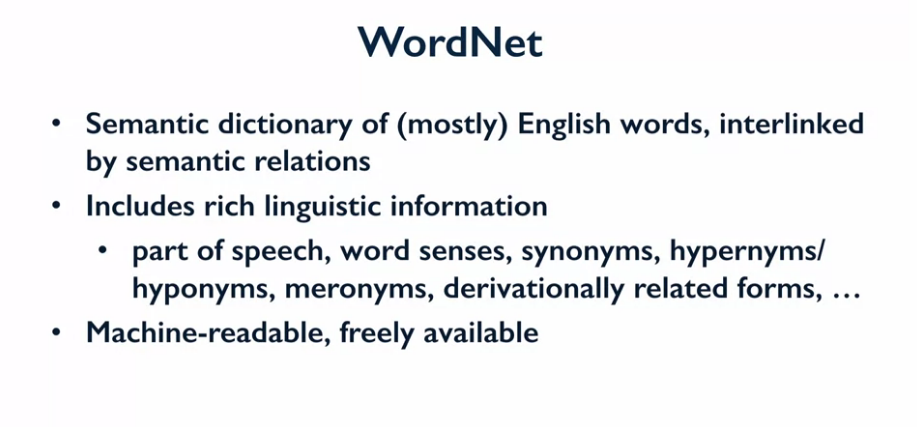
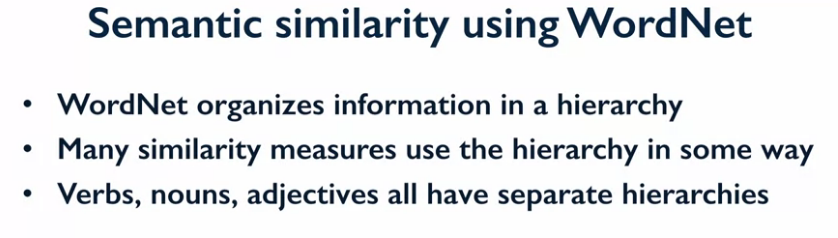
<br>
### Path Similarity: Pathのhierarchyから言葉の類似度を求める。７つパスが遠い場合は1/7　≒　0.14となる
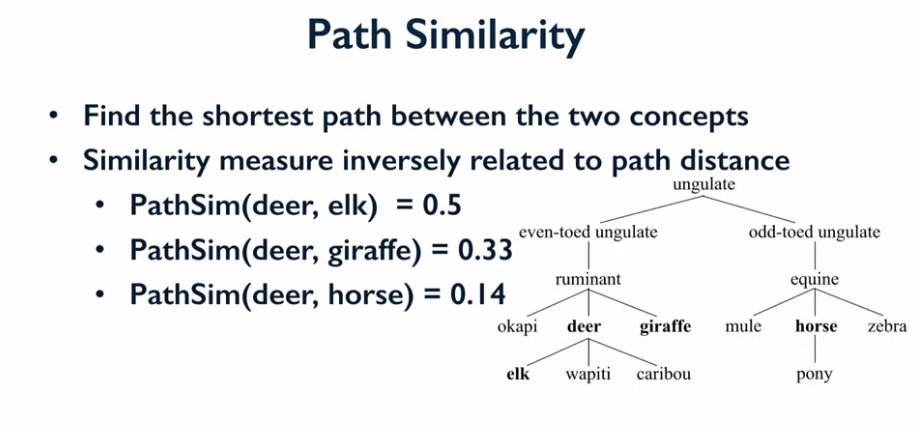
<br>
### LCS: 包摂するhierarchyの祖先から言葉の類似度を求める。
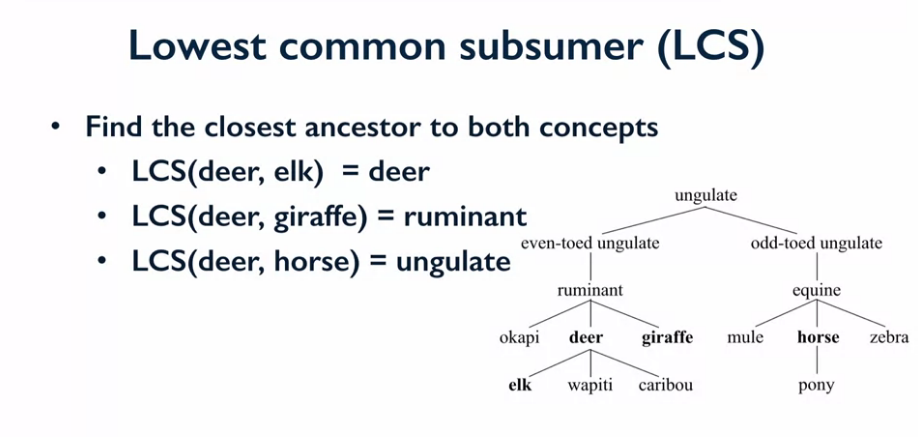
<br>
### Lin Similarity: LCSをベースにCorpusから得たPosibilityを合わせて言葉の類似度を求める。
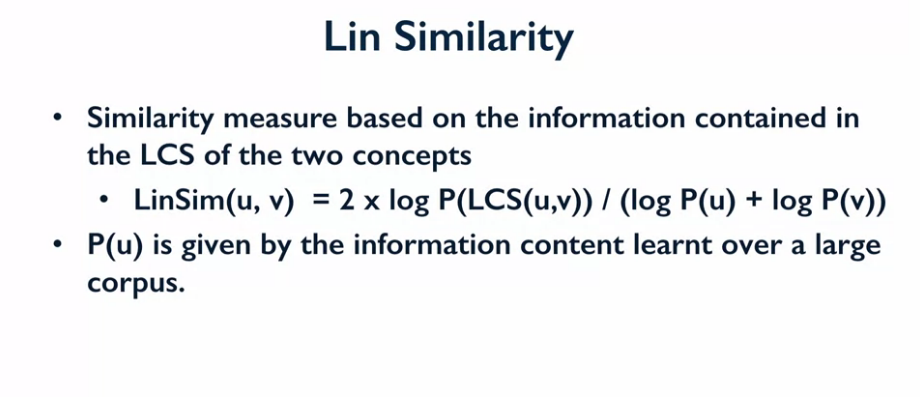

#### Path SimilarityとLin Similarityとでは結果が異なる
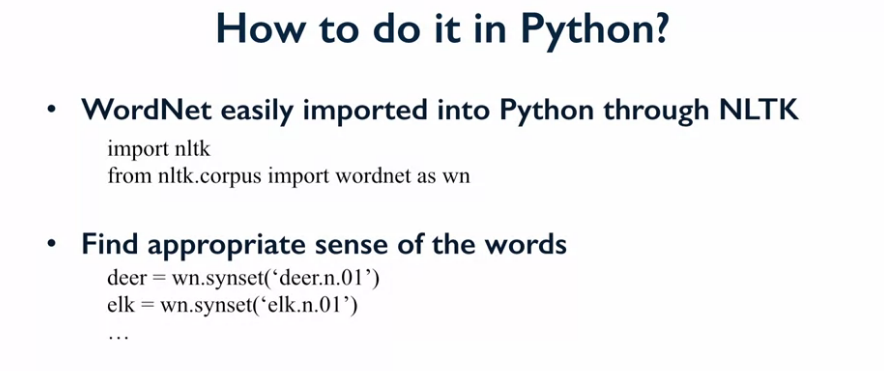
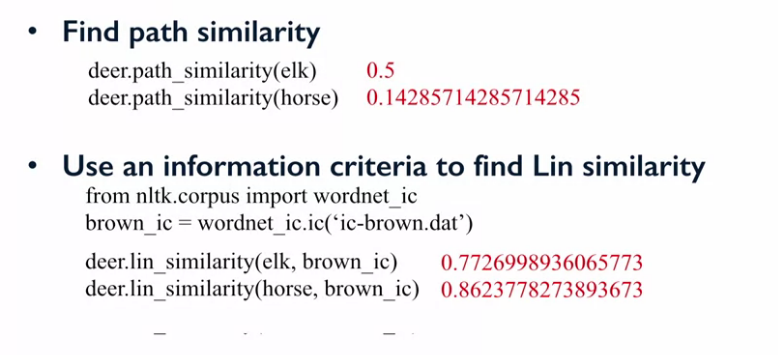
<br>
### Semanticaly Related Words: 同義語、パラフレーズ、文章の位置や相対的に使われ方が同じなどで判断する
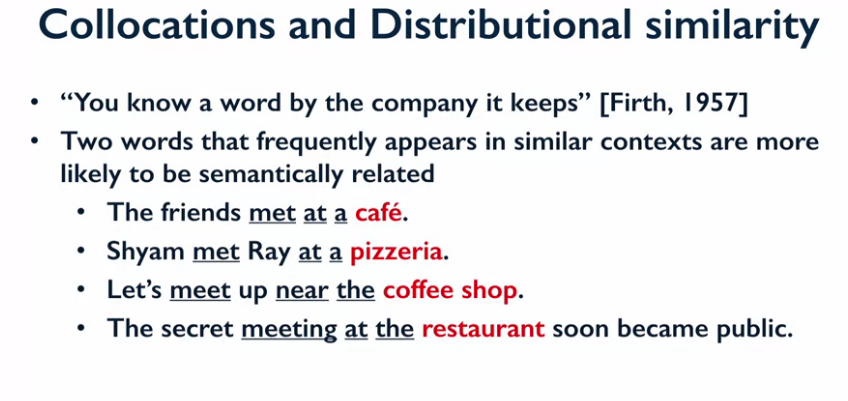

#### Collocationと判断する基準
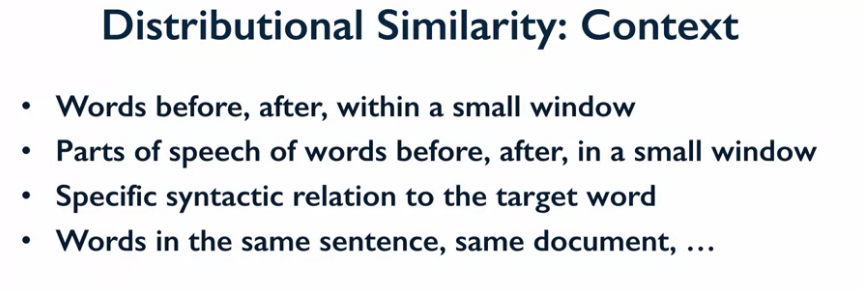
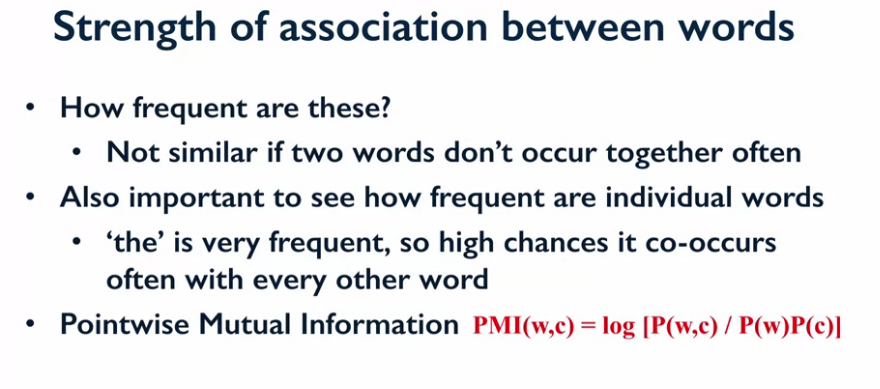
Top10に入るもの: bigram_measures.pmi, 10
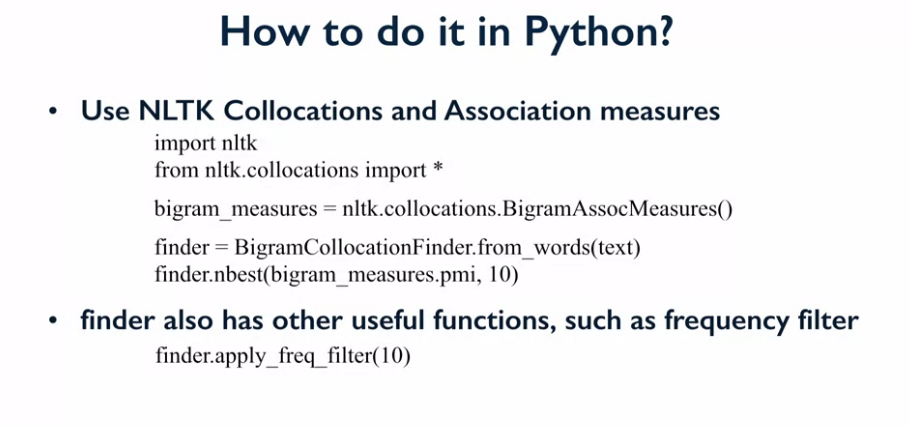

# Topic Modeling
#### Topic:主題を探す
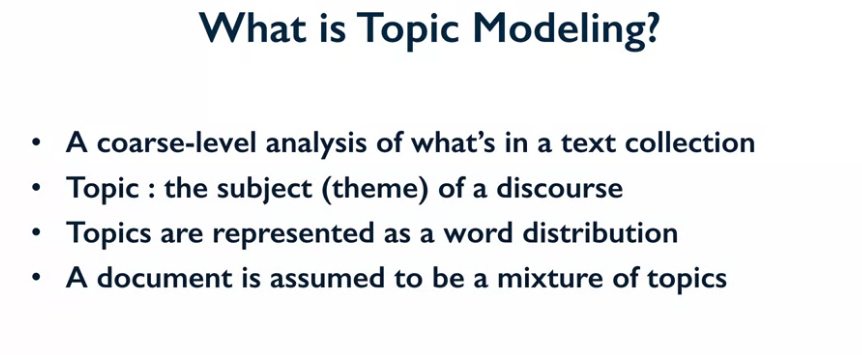
#### Intuitionとしてどの分野の単語が多いかを判断する
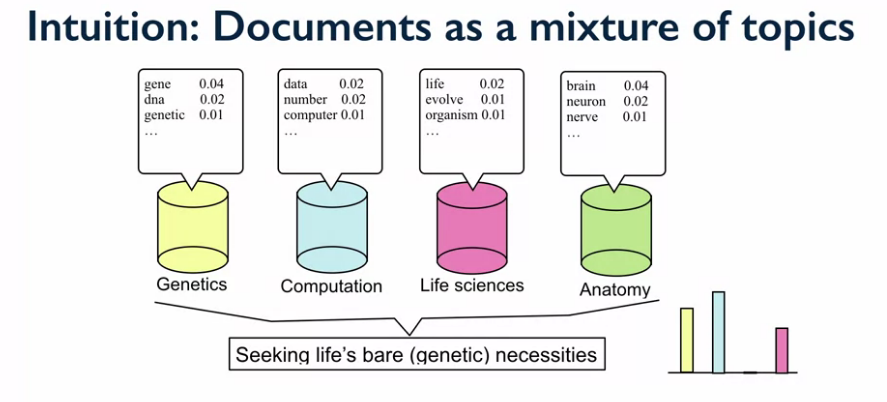
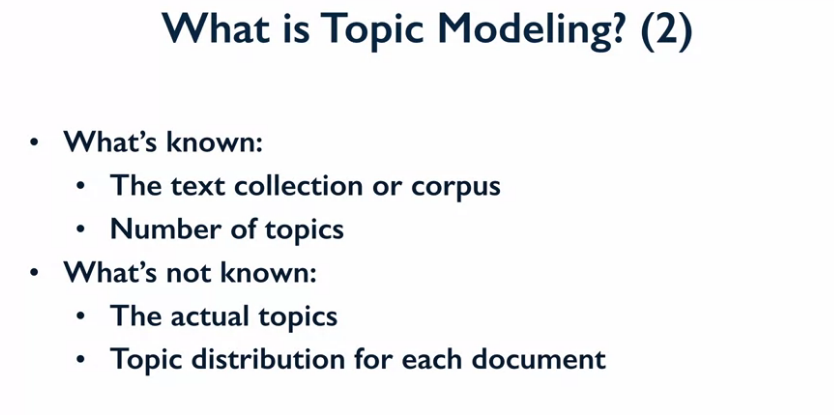
LDA: 最もポピュラーなTopic Modeling
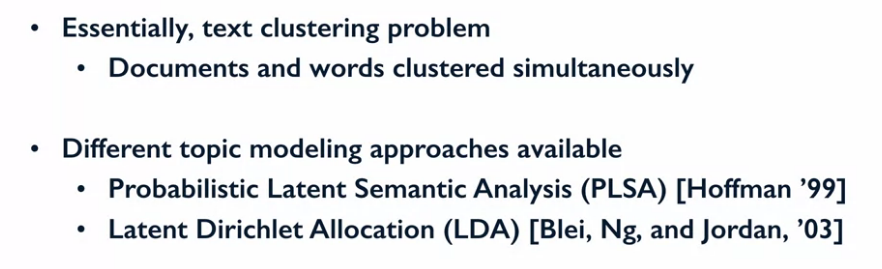

# Genertive Models for Text
#### LDAの役割について
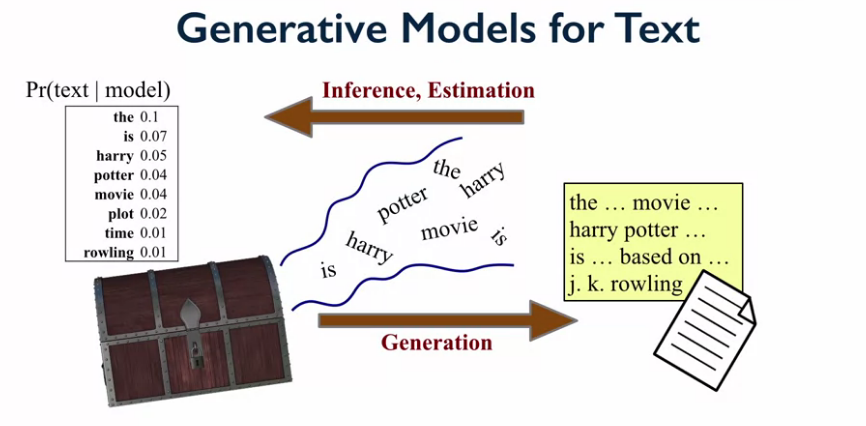

#### Mixtured Topic Modeling
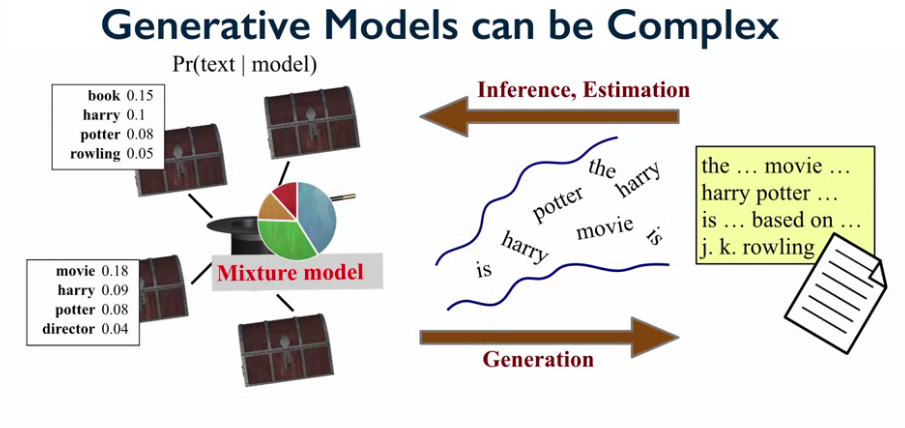

#### LDAの仕組み
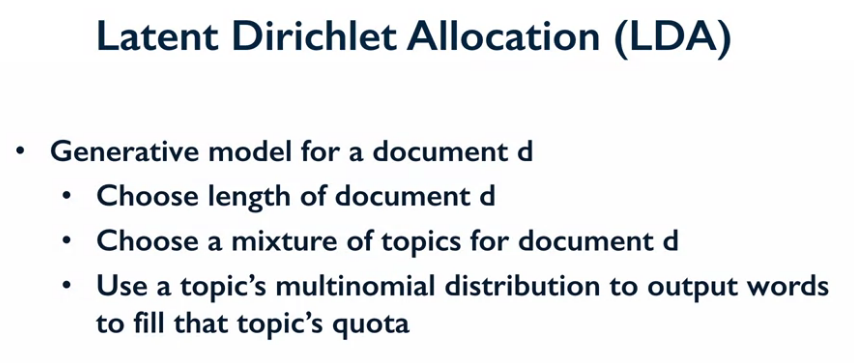

#### Topic Modelingの課題など
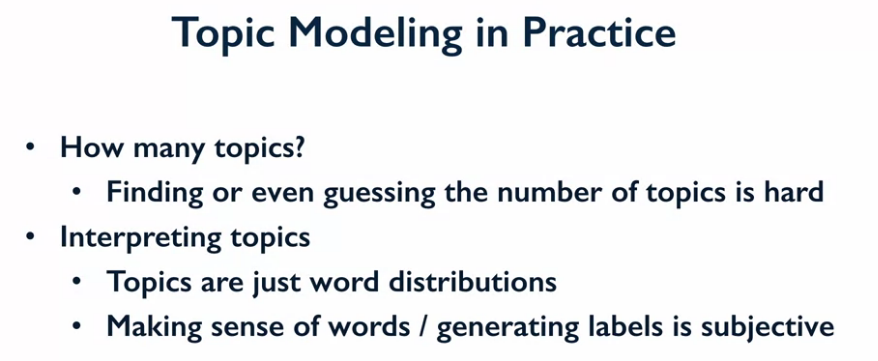

#### Summary
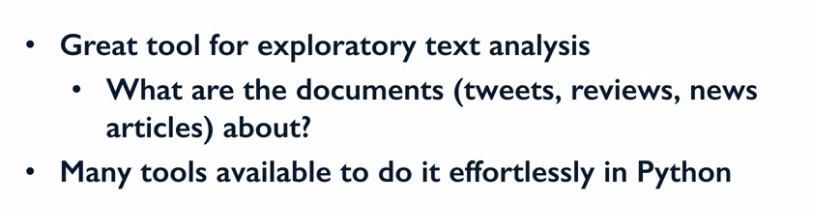

#### PythonでLDAを実装する流れ: LDAモデルを実装するまで
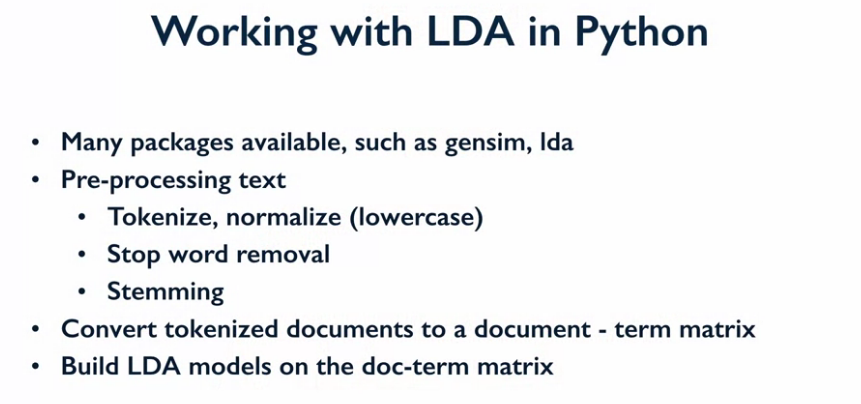
<pr>
Pre-Processing:  LDAモデル実装の一部<br>
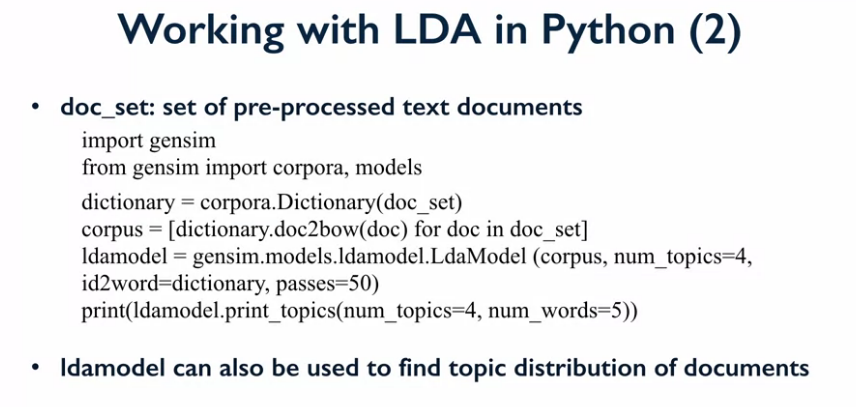


# Information Extraction
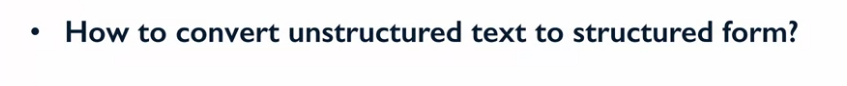
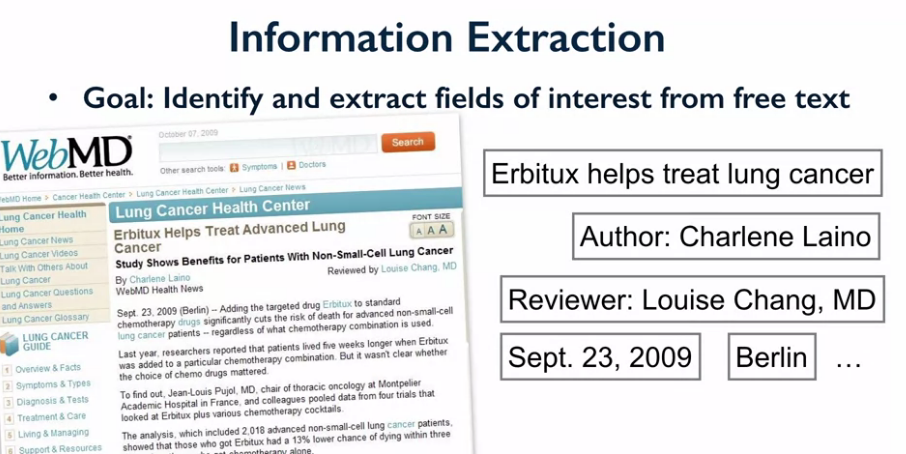

#### Named Entity Recognition: カテゴリなどをどう抽出するかの手段の一つ
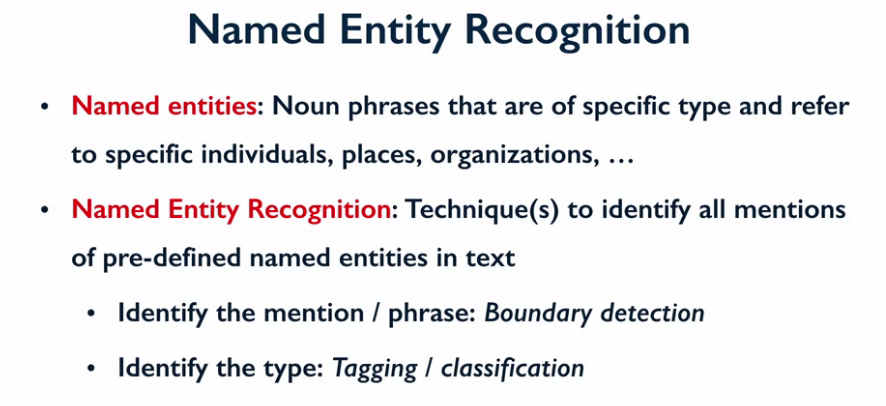

#### How to Identify Named Entity: 正規表現もしくはMLによるアプローチとなる
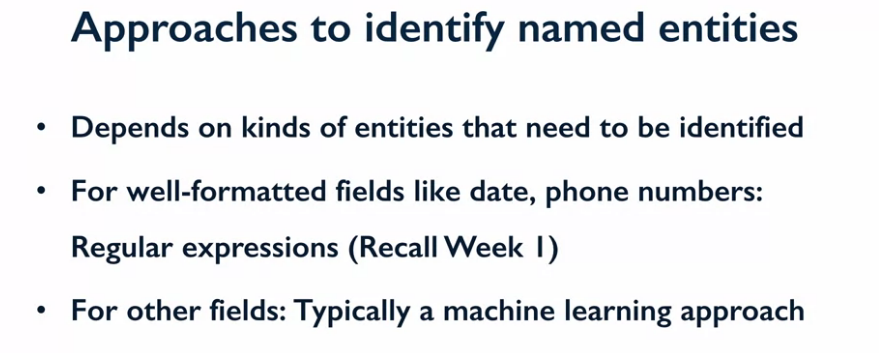

MLによるアプローチ
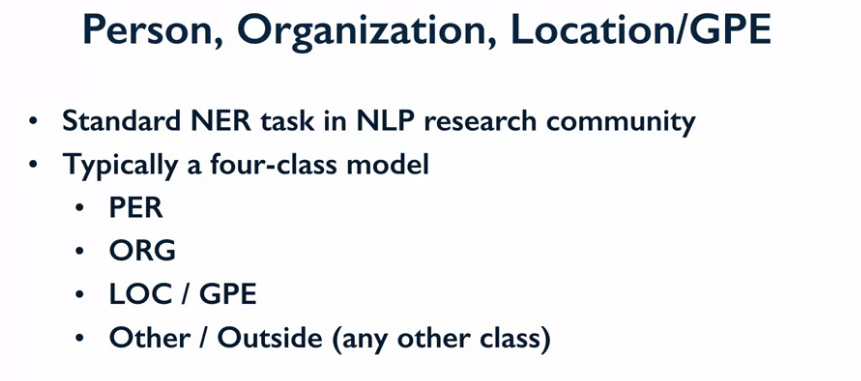

#### Relation Extraction: Named Entities間のリレーションを抽出するタスクのこと
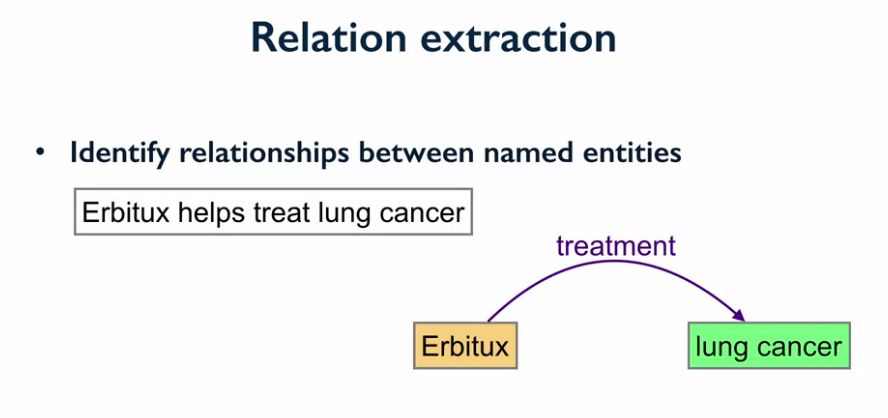

#### Question Answering: 的確な答えを答える。Named Entity Extraction, Relation Extraction,
co-reference resolution(代名詞などの指示先を取得する手法)を使ってモデリングする
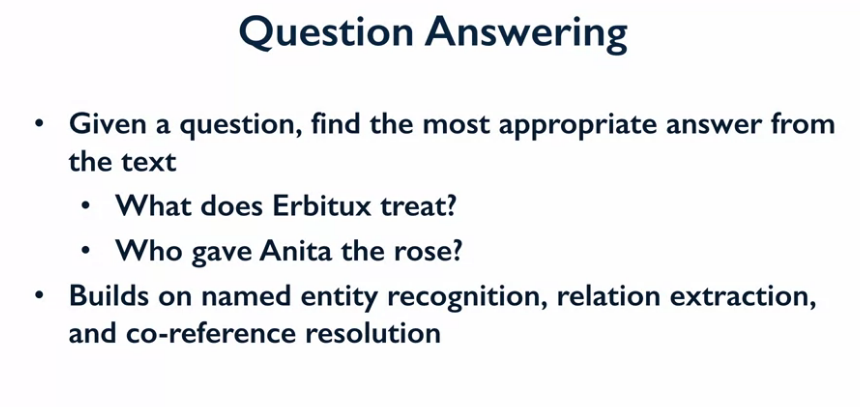

まとめ<br>
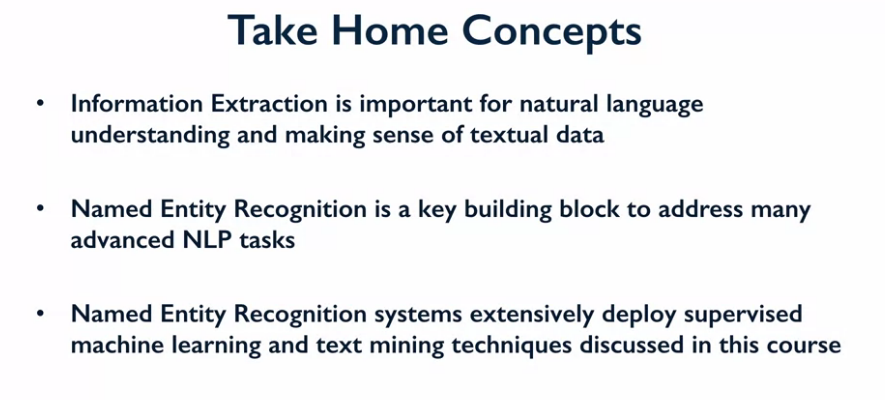


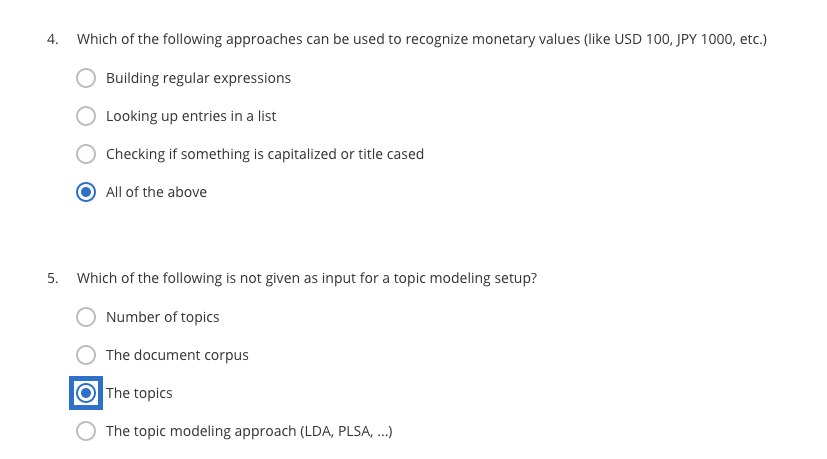